In [179]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import scipy.stats as stats


In [132]:
# importing data
# numpy array with columns of date/time and num_value

PC_0192_details = pd.read_csv("Details_PC-0192.csv", sep=',')
# dtype='str', comments="#", delimiter="\t", unpack=False)
PC_0192_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,PC0192,22/06/2004,NaN,Male,1,22/12/2016 11:53,18/02/2017 17:13,1,10/01/2017 18:00,1,1,28/12/2016 18:00,5,11/01/2017 14:00,FLAMI


In [133]:
# changing required fields to correct datetime data type to avoid string issues

PC_0192_details['failed_extubation_deid_date'] = pd.to_datetime(PC_0192_details['failed_extubation_deid_date'], format='%d/%m/%Y %H:%M')
PC_0192_details['re_intubation_deid_date'] = pd.to_datetime(PC_0192_details['re_intubation_deid_date'], format='%d/%m/%Y %H:%M')

In [134]:
PC_0192_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,PC0192,22/06/2004,NaN,Male,1,22/12/2016 11:53,18/02/2017 17:13,1,2017-01-10 18:00:00,1,1,28/12/2016 18:00,5,2017-01-11 14:00:00,FLAMI


In [135]:
failed_extubation = PC_0192_details.iloc[0,8]
re_intubation = PC_0192_details.iloc[0,13]

print(failed_extubation, re_intubation)

2017-01-10 18:00:00 2017-01-11 14:00:00


In [136]:
# creating df for the time series data

PC_0192_data = pd.read_csv("PC0192_1_HR.csv", sep=',')
PC_0192_data

,monitor,record_date_time,num_value
0,HR,2016-12-22 12:09:21,98
1,HR,2016-12-22 12:09:26,98
2,HR,2016-12-22 12:09:31,98
3,HR,2016-12-22 12:09:36,96
4,HR,2016-12-22 12:09:41,97
...,...,...,...
942176,HR,2017-02-18 17:08:34,96
942177,HR,2017-02-18 17:08:39,96
942178,HR,2017-02-18 17:08:44,95
942179,HR,2017-02-18 17:08:49,96


In [137]:
# making sure 'record_date_time' is of the correct type

# PC_0192_data['record_date_time'] = PC_0192_data['record_date_time'].dt.strftime('%d/%m/%Y %H:%M:%S')
PC_0192_data['record_date_time'] = pd.to_datetime(PC_0192_data['record_date_time'], format='%Y-%m-%d %H:%M:%S')
PC_0192_data

,monitor,record_date_time,num_value
0,HR,2016-12-22 12:09:21,98
1,HR,2016-12-22 12:09:26,98
2,HR,2016-12-22 12:09:31,98
3,HR,2016-12-22 12:09:36,96
4,HR,2016-12-22 12:09:41,97
...,...,...,...
942176,HR,2017-02-18 17:08:34,96
942177,HR,2017-02-18 17:08:39,96
942178,HR,2017-02-18 17:08:44,95
942179,HR,2017-02-18 17:08:49,96


In [138]:
# 'failed_extubation' and 're_intubation' are formatted differently to 'PC_0192_data'
# change manually for now, BUT COME BACK TO THIS AND CHANGE PROPERLY

# failed_extubation_2 = '2017-01-10 18:00:00'
# re_intubation_2 = '2017-01-11 14:00:00'

# fixed this

In [139]:
# PC_0192_data.timestamp.searchsorted(failed_extubation)

In [140]:
# dt='2022-02-07T23:18:06.08349'
# PC_0192_data. timestamp.searchsorted(dt)

In [141]:
# np.where(PC_0192_data["record_date_time"] == test)[0]

In [142]:
# failed_extubation = pd.to_datetime(failed_extubation)
# s = PC_0192_data['record_date_time'].loc[PC_0192_data['record_date_time'].index.unique()[PC_0192_data['record_date_time'].index.unique().get_loc(failed_extubation, method='nearest')]]

In [143]:
# finding indexes at which failed_extubation and re_intubation would need to be inserted to maintain order

failed_extubation_index = PC_0192_data.record_date_time.searchsorted(failed_extubation)
re_intubation_index = PC_0192_data.record_date_time.searchsorted(re_intubation)

print(failed_extubation_index, re_intubation_index)

320515 334633


In [144]:
# lifting data for the time peried where patient was extubated

PC_0192_extubated = PC_0192_data.iloc[failed_extubation_index+1:re_intubation_index-1, :]
PC_0192_extubated

,monitor,record_date_time,num_value
320516,HR,2017-01-10 18:00:06,100
320517,HR,2017-01-10 18:00:11,100
320518,HR,2017-01-10 18:00:16,100
320519,HR,2017-01-10 18:00:21,100
320520,HR,2017-01-10 18:00:26,99
...,...,...,...
334627,HR,2017-01-11 13:59:32,121
334628,HR,2017-01-11 13:59:36,121
334629,HR,2017-01-11 13:59:42,121
334630,HR,2017-01-11 13:59:46,121


<AxesSubplot:xlabel='record_date_time'>

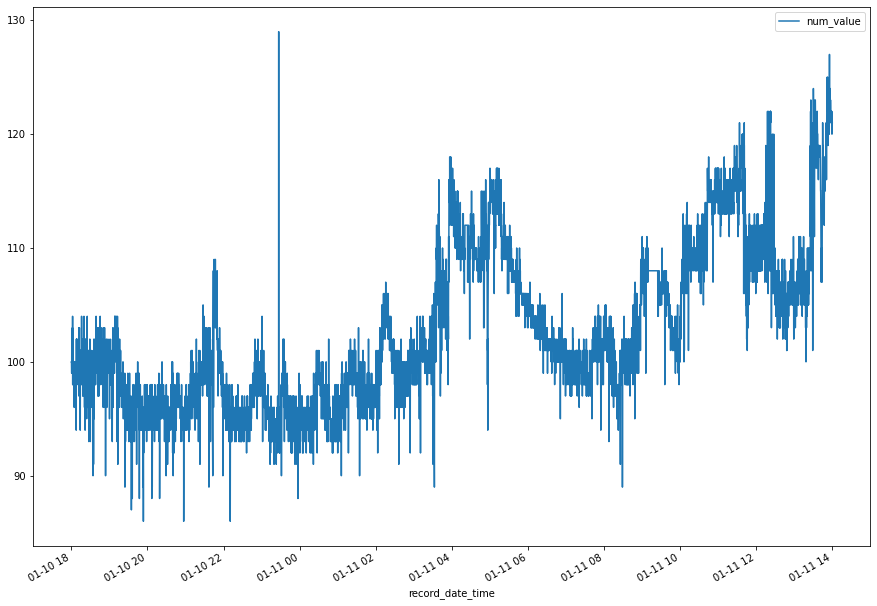

In [145]:
PC_0192_extubated.plot('record_date_time', 'num_value', figsize=(15, 11))

- anomalous point just before 01-11 00:00?
- leave as is for now

In [146]:
# use timedelta to add a period of time to a timestamp:

PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=10)
PC_0192_extubated['record_date_time'].iloc[-1]

Timestamp('2017-01-11 13:59:52')

### Rolling mean:

In [147]:
# following has incorrect timestamps

# k = 0

# PC_0192_mean = pd.DataFrame(columns=['start_time','end_time','mean'])

# while (PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=10+k)) < PC_0192_extubated['record_date_time'].iloc[-1]:

#     index_1 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=k))
#     index_2 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=10+k))

#     mean = PC_0192_extubated['num_value'][index_1:index_2].mean(axis=0)

#     PC_0192_mean = PC_0192_mean.append({'start_time': PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=k),
#     'end_time':PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=10+k), 'mean':mean}, ignore_index=True)
#     k += 1


In [148]:
k = 0

PC_0192_mean = pd.DataFrame(columns=['start_time','end_time','mean'])

while (PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=10+k)) < PC_0192_extubated['record_date_time'].iloc[-1]:

    index_1 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=k))
    index_2 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=10+k))

    mean = PC_0192_extubated['num_value'][index_1:index_2].mean(axis=0)

    PC_0192_mean = PC_0192_mean.append({'start_time': PC_0192_extubated['record_date_time'].iloc[index_1], 'end_time':PC_0192_extubated['record_date_time'].iloc[index_2], 'mean':mean}, ignore_index=True)
    k += 1

In [149]:
PC_0192_extubated['record_date_time'].iloc[index_1]

Timestamp('2017-01-11 13:49:07')

In [150]:
PC_0192_mean

,start_time,end_time,mean
0,2017-01-10 18:00:06,2017-01-10 18:10:06,99.521008
1,2017-01-10 18:01:06,2017-01-10 18:11:06,99.487395
2,2017-01-10 18:02:11,2017-01-10 18:12:06,99.344538
3,2017-01-10 18:03:06,2017-01-10 18:13:06,99.383333
4,2017-01-10 18:04:06,2017-01-10 18:14:06,99.4
...,...,...,...
1185,2017-01-11 13:45:07,2017-01-11 13:55:07,119.408333
1186,2017-01-11 13:46:07,2017-01-11 13:56:06,119.916667
1187,2017-01-11 13:47:07,2017-01-11 13:57:06,120.483333
1188,2017-01-11 13:48:07,2017-01-11 13:58:07,121.075


In [151]:
# PC_0192_mean.plot(x='start_time', y='mean')

# TypeError: no numeric data to plot

In [152]:
index_1 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=k))
index_2 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=10+k))

mean = PC_0192_extubated['num_value'][index_1:index_2].mean()
mean

121.98305084745763

In [153]:
PC_0192_mean.dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
mean                  object
dtype: object

In [154]:
# PC_0192_mean['mean'] = pd.to_numeric(PC_0192_mean['mean'])

# TypeError: Invalid object type at position 910

In [155]:
PC_0192_mean.iloc[910]

start_time    2017-01-11 09:24:32
end_time      2017-01-11 09:24:32
mean                          NaT
Name: 910, dtype: object

In [156]:
# PC_0192_mean = PC_0192_mean.drop(910)

In [157]:
# PC_0192_mean.plot(x='start_time', y='mean')

In [158]:
# PC_0192_mean['mean'] = pd.to_numeric(PC_0192_mean['mean'])

# TypeError: Invalid object type at position 910

In [159]:
# systematically removing NaT rows

for i, row in enumerate(PC_0192_mean['mean']):
    if pd.isnull(row):
        PC_0192_mean = PC_0192_mean.drop(i)

In [160]:
# PC_0192_mean['mean'] = pd.to_numeric(PC_0192_mean['mean'])

# TypeError: Invalid object type at position 910

The correlation coefficient of the mean is 1.0 which is strong positive.


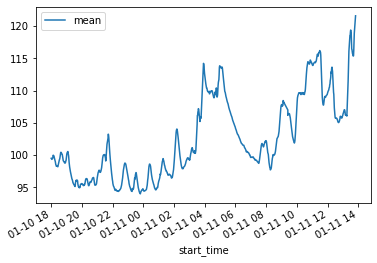

In [161]:
PC_0192_mean['mean'] = pd.to_numeric(PC_0192_mean['mean'])

PC_0192_mean.plot(x='start_time', y='mean')

print(f"The correlation coefficient of the mean is {PC_0192_mean.corr()['mean'][0]} which is strong positive.")

don't really understand significance of increasing mean COME BACK TO THIS!

### Rolling variance (intervals of 10 mins):

In [162]:
k = 0

PC_0192_var_10_min = pd.DataFrame(columns=['start_time','end_time','variance'])

while (PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=10+k)) < PC_0192_extubated['record_date_time'].iloc[-1]:

    index_1 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=k))
    index_2 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=10+k))

    var = PC_0192_extubated['num_value'][index_1:index_2].var(axis=0)

    PC_0192_var_10_min = PC_0192_var_10_min.append({'start_time': PC_0192_extubated['record_date_time'].iloc[index_1], 'end_time':PC_0192_extubated['record_date_time'].iloc[index_2], 'variance':var}, ignore_index=True)
    k += 1


In [163]:
PC_0192_var_10_min

,start_time,end_time,variance
0,2017-01-10 18:00:06,2017-01-10 18:10:06,1.963538
1,2017-01-10 18:01:06,2017-01-10 18:11:06,1.963823
2,2017-01-10 18:02:11,2017-01-10 18:12:06,1.685372
3,2017-01-10 18:03:06,2017-01-10 18:13:06,1.683754
4,2017-01-10 18:04:06,2017-01-10 18:14:06,1.939496
...,...,...,...
1185,2017-01-11 13:45:07,2017-01-11 13:55:07,9.520938
1186,2017-01-11 13:46:07,2017-01-11 13:56:06,10.497199
1187,2017-01-11 13:47:07,2017-01-11 13:57:06,10.503922
1188,2017-01-11 13:48:07,2017-01-11 13:58:07,8.053151


In [164]:
# systematically removing NaT rows

for i, row in enumerate(PC_0192_var_10_min['variance']):
    if pd.isnull(row):
        PC_0192_var_10_min = PC_0192_var_10_min.drop(i)

<AxesSubplot:xlabel='start_time'>

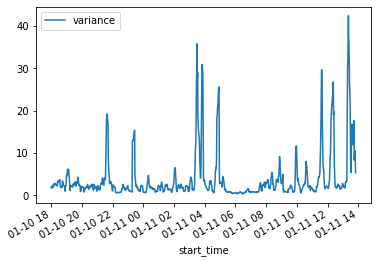

In [165]:
PC_0192_var_10_min['variance'] = pd.to_numeric(PC_0192_var_10_min['variance'])

PC_0192_var_10_min.plot(x='start_time', y='variance')

rough notes:

- patches of low variance throughout
- but we generally see higher variances closer to the critical point (lower resilience)
- this suggests the critical slowing down begins quite early on, in this case variance gets relatively high about 11 hours before critical point

### Rolling variance (intervals of 1 hour):

In [166]:
k = 0

PC_0192_var_1_hour = pd.DataFrame(columns=['start_time','end_time','variance'])

while (PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=60+k)) < PC_0192_extubated['record_date_time'].iloc[-1]:

    index_1 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=k))
    index_2 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=60+k))

    var = PC_0192_extubated['num_value'][index_1:index_2].var(axis=0)

    PC_0192_var_1_hour = PC_0192_var_1_hour.append({'start_time': PC_0192_extubated['record_date_time'].iloc[index_1], 'end_time':PC_0192_extubated['record_date_time'].iloc[index_2], 'variance':var}, ignore_index=True)
    k += 1

In [167]:
PC_0192_var_1_hour

,start_time,end_time,variance
0,2017-01-10 18:00:06,2017-01-10 19:00:10,2.794764
1,2017-01-10 18:01:06,2017-01-10 19:01:10,2.812136
2,2017-01-10 18:02:11,2017-01-10 19:02:10,2.756124
3,2017-01-10 18:03:06,2017-01-10 19:03:10,2.717823
4,2017-01-10 18:04:06,2017-01-10 19:04:10,2.724989
...,...,...,...
1135,2017-01-11 12:55:08,2017-01-11 13:55:07,43.828784
1136,2017-01-11 12:56:08,2017-01-11 13:56:06,45.213919
1137,2017-01-11 12:57:08,2017-01-11 13:57:06,46.413874
1138,2017-01-11 12:58:08,2017-01-11 13:58:07,46.996571


In [168]:
# systematically removing NaT rows

for i, row in enumerate(PC_0192_var_1_hour['variance']):
    if pd.isnull(row):
        PC_0192_var_1_hour = PC_0192_var_1_hour.drop(i)

The correlation coefficient of the variance is 1.0 which is strong positive.


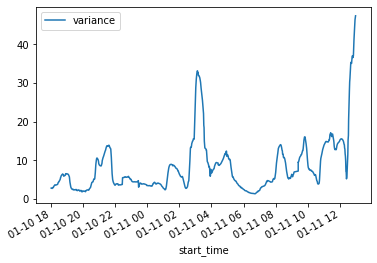

In [169]:
PC_0192_var_1_hour['variance'] = pd.to_numeric(PC_0192_var_1_hour['variance'])

PC_0192_var_1_hour.plot(x='start_time', y='variance')

print(f"The correlation coefficient of the variance is {PC_0192_var_1_hour.corr()['variance'][0]} which is strong positive.")

### Autocorrelation:

In [170]:
idx1 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[0])
idx2 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=20))

idx3 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[-1] - timedelta(minutes=20))
idx4 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[-1])


# pd.plotting.lag_plot(PC_0192_extubated['num_value'][idx1:idx2], lag=1)
# print(f"Autocorrelation for first 20 mins: {PC_0192_extubated['num_value'][idx1:idx2].autocorr()}")

Autocorrelation for first 20 mins: 0.44161008980408856


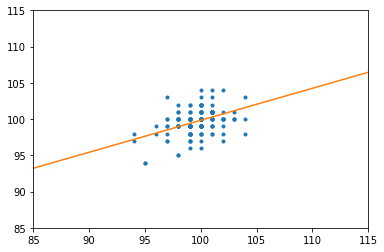

In [171]:
plt.plot(PC_0192_extubated['num_value'][idx1:idx2], PC_0192_extubated['num_value'][idx1+1:idx2+1], '.')

theta = np.polyfit(PC_0192_extubated['num_value'][idx1:idx2], PC_0192_extubated['num_value'][idx1+1:idx2+1], 1)
line_of_best_fit1 = theta[1] + theta[0] * np.linspace(85,115,400)

plt.plot(np.linspace(85,115,400), line_of_best_fit1)

plt.xlim(xmin=85,xmax=115)
plt.ylim(ymin=85,ymax=115)

print(f"Autocorrelation for first 20 mins: {PC_0192_extubated['num_value'][idx1:idx2].autocorr()}")

Autocorrelation for final 20 mins: 0.9700082051791865


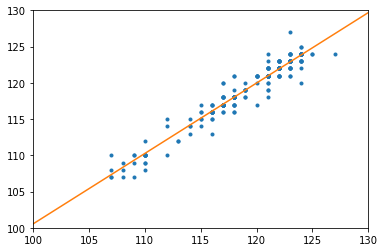

In [172]:
plt.plot(PC_0192_extubated['num_value'][idx3-1:idx4-1], PC_0192_extubated['num_value'][idx3:idx4], '.')

theta = np.polyfit(PC_0192_extubated['num_value'][idx3-1:idx4-1], PC_0192_extubated['num_value'][idx3:idx4], 1)
line_of_best_fit2 = theta[1] + theta[0] * np.linspace(100,130,400)

plt.plot(np.linspace(100,130,400), line_of_best_fit2)

plt.xlim(xmin=100,xmax=130)
plt.ylim(ymin=100,ymax=130)

print(f"Autocorrelation for final 20 mins: {PC_0192_extubated['num_value'][idx3:idx4].autocorr()}")

results as expected!
(10 mins looked like too few data points so used the initial and finial 20 mins to data points)

In [173]:
k = 0

PC_0192_ac_1_hour = pd.DataFrame(columns=['start_time','end_time','autocorrelation'])

while (PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=60+k)) < PC_0192_extubated['record_date_time'].iloc[-1]:

    index_1 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=k))
    index_2 = PC_0192_extubated.record_date_time.searchsorted(PC_0192_extubated['record_date_time'].iloc[0] + timedelta(minutes=60+k))

    ac = PC_0192_extubated['num_value'][index_1:index_2].autocorr()

    PC_0192_ac_1_hour = PC_0192_ac_1_hour.append({'start_time': PC_0192_extubated['record_date_time'].iloc[index_1], 'end_time':PC_0192_extubated['record_date_time'].iloc[index_2], 'autocorrelation':ac}, ignore_index=True)
    k += 1

In [174]:
# systematically removing NaT rows

for i, row in enumerate(PC_0192_ac_1_hour['autocorrelation']):
    if pd.isnull(row):
        PC_0192_ac_1_hour = PC_0192_ac_1_hour.drop(i)

The correlation coefficient of the autocorrelation is 1.0 which is strong positive.


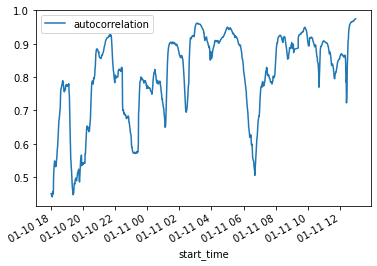

In [175]:
PC_0192_ac_1_hour['autocorrelation'] = pd.to_numeric(PC_0192_ac_1_hour['autocorrelation'])

PC_0192_ac_1_hour.plot(x='start_time', y='autocorrelation')

# theta = np.polyfit(enumerate(PC_0192_ac_1_hour['autocorrelation'])[0], enumerate(PC_0192_ac_1_hour['autocorrelation'])[1], 1)
# line_of_best_fit2 = theta[1] + theta[0] * np.linspace(1,100,400)

# plt.plot(np.linspace(1,100,400), line_of_best_fit2)

print(f"The correlation coefficient of the autocorrelation is {PC_0192_ac_1_hour.corr()['autocorrelation'][0]} which is strong positive.")

general upwards trend?

### Making this into a function:

In [183]:
def rolling_variance(data, time):
    """
    Inputs:
    data - data frame of numerical values during the time the patient was exhastubated with columns 'record_date_time' and 'variance'
    time - size of window in minutes
    """
    k = 0

    df = pd.DataFrame(columns=['start_time','end_time','variance'])

    while (data['record_date_time'].iloc[0] + timedelta(minutes=time+k)) < data['record_date_time'].iloc[-1]:

        index_1 = data.record_date_time.searchsorted(data['record_date_time'].iloc[0] + timedelta(minutes=k))
        index_2 = data.record_date_time.searchsorted(data['record_date_time'].iloc[0] + timedelta(minutes=time+k))

        var = data['num_value'][index_1:index_2].var()

        df = df.append({'start_time': data['record_date_time'].iloc[index_1], 'end_time':data['record_date_time'].iloc[index_2], 'variance':var}, ignore_index=True)
        k += 1

    for i, row in enumerate(df['variance']):
        if pd.isnull(row):
            df = df.drop(i)
    
    df['variance'] = pd.to_numeric(df['variance'])

    df.plot(x='start_time', y='variance', figsize=(10,8))

    print(f"The kendall tau correlation coefficient of the variance is {stats.kendalltau(df['start_time'], df['variance'])[0]}, and the p-value is {stats.kendalltau(df['start_time'], df['variance'])[1]}.")
        

The kendall tau correlation coefficient of the variance is 0.3096655841143819, and the p-value is 2.9337910011432675e-55.


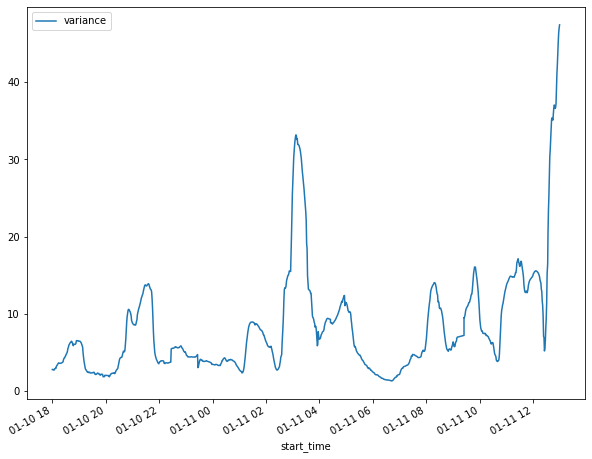

In [184]:
rolling_variance(PC_0192_extubated, 60)

In [284]:
def rolling_autocorrelation(data, time):
    """
    Inputs:
    data - data frame of numerical values during the time the patient was exhastubated with columns 'record_date_time' and 'autocorrelation'
    time - size of window in minutes
    """
    k = 0

    df = pd.DataFrame(columns=['start_time','end_time','autocorrelation'])

    while (data['record_date_time'].iloc[0] + timedelta(minutes=time+k)) < data['record_date_time'].iloc[-1]:

        index_1 = data.record_date_time.searchsorted(data['record_date_time'].iloc[0] + timedelta(minutes=k))
        index_2 = data.record_date_time.searchsorted(data['record_date_time'].iloc[0] + timedelta(minutes=time+k))

        ac = data['num_value'][index_1:index_2].autocorr()

        df = df.append({'start_time': data['record_date_time'].iloc[index_1], 'end_time':data['record_date_time'].iloc[index_2], 'autocorrelation':ac}, ignore_index=True)
        k += 1

    for i, row in enumerate(df['autocorrelation']):
        if pd.isnull(row):
            df = df.drop(i)
    
    df['autocorrelation'] = pd.to_numeric(df['autocorrelation'])

    df.plot(x='start_time', y='autocorrelation', figsize=(10,8))

    print(f"The correlation coefficient of the autocorrelation is {df.corr()['autocorrelation'][0]}.")

The correlation coefficient of the autocorrelation is 1.0.


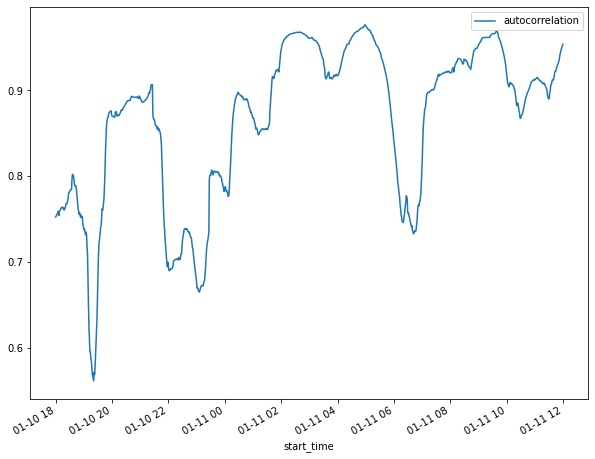

In [285]:
rolling_autocorrelation(PC_0192_extubated, 120)